# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy import stats

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city and country count to confirm sufficient count
print(len(cities))
print(len(countries))

644
644


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
# Create a data frame to hold the information for the cities with iterative API calls
cities_df = pd.DataFrame(cities)
# Create empty columns for the data frame for each piece of information of interest
cities_df["City"] = cities
cities_df["Country Code"] = countries
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Temperature (F)"] = ""
cities_df["Humdidity (%)"] = ""
cities_df["Wind Speed (mph)"] = ""
cities_df["Cloudiness (%)"] = ""
# Drop the redundant City column
cities_df = cities_df.drop(cities_df.columns[0],axis=1)

# Preview the data frame to ensure the list of cities populated properly
cities_df.head(20)

# Ensure there are no null values
# cities_df.count()

,City,Country Code,Lat,Lng,Temperature (F),Humdidity (%),Wind Speed (mph),Cloudiness (%)
0,faanui,pf,,,,,,
1,bengkulu,id,,,,,,
2,palora,ec,,,,,,
3,bluff,nz,,,,,,
4,saskylakh,ru,,,,,,
5,cortez,us,,,,,,
6,aksarka,ru,,,,,,
7,tabatinga,br,,,,,,
8,qasigiannguit,gl,,,,,,
9,muros,es,,,,,,


In [43]:
# Set up the parameters for successive API calls
#base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Specify the type of unit measurement for the temperatures returned
units = "imperial"

# Set up lists for each column of information
updated_city = []
countries = []
latitude = []
longitude = []
temps = []
humidity = []
windspeed = []
cloudiness = []

#Set up a counter to track the number of successful OWM API calls from the cities generated from the CitiPy API
city_counter = 0

# Begin the successive API calls based on the geographic coordinates, adding the values to the data frame 
# Also prints a list of the city as well as its country code
print("Begin the Data Retrieval from the Open Weather Map API")
print("------------------------------------------------------")

for index, row in cities_df.iterrows():
    
    # Set the city to search the API for from the cities_df database
    city = row['City']
    #country = row['Country Code']
    
    # Set up the query URL for the API calls
    query_url = base_url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    
    # Call the API with a timeout parameter to avoid exceptions being thrown
    weather_data = requests.get(query_url, timeout=(20, 25)).json()
    
    # Conditional statement to first see if the reponse code is valid or if the city was not found
    if weather_data["cod"] == "404":
        print("City was not found in the OWM API.")
    
    # Increments the count of cities found by one, appends the information from the API call to respective lists
    # Prints the results of the API calls
    else:
        city_counter += 1
        current_city = weather_data['name']
        updated_city.append(current_city)
        current_country = weather_data['sys']['country']
        countries.append(current_country)
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temps.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        windspeed.append(weather_data['wind']['speed'])
        cloudiness.append(weather_data['clouds']['all'])
        print(f"Weather record found for city #{city_counter}: {current_city} , {country}")
        print(f"There are now {len(updated_city)} cities in the list")
    
    # Adds a sleep between calls so the API source doesn't cut the connection
    sleep = 5
    

# updated_city

Begin the Data Retrieval from the Open Weather Map API
------------------------------------------------------
Weather record found for city #1: Faanui , pf
There are now 1 cities in the list
City was not found in the OWM API.
Weather record found for city #2: Palora , ec
There are now 2 cities in the list
Weather record found for city #3: Bluff , nz
There are now 3 cities in the list
Weather record found for city #4: Saskylakh , ru
There are now 4 cities in the list
Weather record found for city #5: Cortez , us
There are now 5 cities in the list
Weather record found for city #6: Aksarka , ru
There are now 6 cities in the list
Weather record found for city #7: Tabatinga , br
There are now 7 cities in the list
Weather record found for city #8: Qasigiannguit , gl
There are now 8 cities in the list
Weather record found for city #9: Muros , es
There are now 9 cities in the list
Weather record found for city #10: Barrow , us
There are now 10 cities in the list
Weather record found for city #

Weather record found for city #92: Chernyshevskiy , ru
There are now 92 cities in the list
Weather record found for city #93: Hobyo , so
There are now 93 cities in the list
Weather record found for city #94: La Ronge , ca
There are now 94 cities in the list
Weather record found for city #95: Kaitangata , nz
There are now 95 cities in the list
Weather record found for city #96: Lompoc , us
There are now 96 cities in the list
Weather record found for city #97: Mahebourg , mu
There are now 97 cities in the list
Weather record found for city #98: Guerrero Negro , mx
There are now 98 cities in the list
Weather record found for city #99: Adrar , dz
There are now 99 cities in the list
Weather record found for city #100: Imbituba , br
There are now 100 cities in the list
Weather record found for city #101: Hervey Bay , au
There are now 101 cities in the list
City was not found in the OWM API.
Weather record found for city #102: Bethel , us
There are now 102 cities in the list
Weather record fo

Weather record found for city #183: Almenara , br
There are now 183 cities in the list
Weather record found for city #184: San Policarpo , ph
There are now 184 cities in the list
Weather record found for city #185: Bamboo , jm
There are now 185 cities in the list
Weather record found for city #186: Norsup , vu
There are now 186 cities in the list
City was not found in the OWM API.
Weather record found for city #187: Sitka , us
There are now 187 cities in the list
Weather record found for city #188: Itapirapua , br
There are now 188 cities in the list
Weather record found for city #189: Malazgirt , tr
There are now 189 cities in the list
Weather record found for city #190: Baghdad , iq
There are now 190 cities in the list
Weather record found for city #191: Panalingaan , ph
There are now 191 cities in the list
Weather record found for city #192: Kahului , us
There are now 192 cities in the list
Weather record found for city #193: Maniitsoq , gl
There are now 193 cities in the list
City 

Weather record found for city #270: Atbasar , kz
There are now 270 cities in the list
Weather record found for city #271: Luau , ao
There are now 271 cities in the list
Weather record found for city #272: Sinnamary , gf
There are now 272 cities in the list
Weather record found for city #273: Talcahuano , cl
There are now 273 cities in the list
City was not found in the OWM API.
Weather record found for city #274: Evanston , us
There are now 274 cities in the list
Weather record found for city #275: Lengshuitan , cn
There are now 275 cities in the list
Weather record found for city #276: Naze , jp
There are now 276 cities in the list
Weather record found for city #277: Lasa , cn
There are now 277 cities in the list
Weather record found for city #278: Marienburg , sr
There are now 278 cities in the list
Weather record found for city #279: Puri , in
There are now 279 cities in the list
Weather record found for city #280: Tabou , ci
There are now 280 cities in the list
Weather record found

Weather record found for city #361: Lexington , us
There are now 361 cities in the list
Weather record found for city #362: Kisangani , cd
There are now 362 cities in the list
City was not found in the OWM API.
Weather record found for city #363: Mezen , ru
There are now 363 cities in the list
Weather record found for city #364: Tura , ru
There are now 364 cities in the list
Weather record found for city #365: Kokopo , pg
There are now 365 cities in the list
Weather record found for city #366: Biak , id
There are now 366 cities in the list
Weather record found for city #367: Pemba , mz
There are now 367 cities in the list
Weather record found for city #368: Batagay-Alyta , ru
There are now 368 cities in the list
Weather record found for city #369: Tual , id
There are now 369 cities in the list
Weather record found for city #370: Mitchell , us
There are now 370 cities in the list
Weather record found for city #371: Pritzwalk , de
There are now 371 cities in the list
Weather record found

Weather record found for city #455: Banchory , gb
There are now 455 cities in the list
Weather record found for city #456: Santa Lucia , ec
There are now 456 cities in the list
Weather record found for city #457: Yelkhovka , ru
There are now 457 cities in the list
Weather record found for city #458: Richards Bay , za
There are now 458 cities in the list
Weather record found for city #459: Waipawa , nz
There are now 459 cities in the list
Weather record found for city #460: Punto Fijo , ve
There are now 460 cities in the list
Weather record found for city #461: Khorramshahr , ir
There are now 461 cities in the list
Weather record found for city #462: Sept-Iles , ca
There are now 462 cities in the list
Weather record found for city #463: Bayan , kw
There are now 463 cities in the list
Weather record found for city #464: Isla Mujeres , mx
There are now 464 cities in the list
Weather record found for city #465: Baykit , ru
There are now 465 cities in the list
Weather record found for city 

Weather record found for city #546: Kudahuvadhoo , mv
There are now 546 cities in the list
Weather record found for city #547: Tornabe , hn
There are now 547 cities in the list
Weather record found for city #548: Kaohsiung , tw
There are now 548 cities in the list
Weather record found for city #549: Znamenskoye , ru
There are now 549 cities in the list
Weather record found for city #550: Emerald , au
There are now 550 cities in the list
Weather record found for city #551: Manzhouli , cn
There are now 551 cities in the list
Weather record found for city #552: Jishou , cn
There are now 552 cities in the list
Weather record found for city #553: Makakilo City , us
There are now 553 cities in the list
Weather record found for city #554: Hammerfest , no
There are now 554 cities in the list
Weather record found for city #555: Wanaka , nz
There are now 555 cities in the list
Weather record found for city #556: Port Said , eg
There are now 556 cities in the list
Weather record found for city #5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [58]:
print(len(updated_city))
print(len(countries))

581
581


In [69]:
api_city_df = pd.DataFrame()
api_city_df["City"] = updated_city
api_city_df["Country Code"] = countries
api_city_df["Lat"] = latitude
api_city_df["Lng"] = longitude
api_city_df["Temperature (F)"] = temps
api_city_df["Humidity (%)"] = humidity
api_city_df["Wind Speed (mph)"] = windspeed
api_city_df["Cloudiness (%)"] = cloudiness


api_city_df.to_csv("../Output/OWMdataframe.csv", index=False, header=True)

api_city_df.head()

,City,Country Code,Lat,Lng,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,Faanui,PF,-16.48,-151.75,82.66,100,6.96,68
1,Palora,EC,-1.70,-77.97,78.03,69,8.05,75
2,Bluff,AU,-23.58,149.07,70.51,69,12.21,0
3,Saskylakh,RU,71.97,114.09,-25.62,38,4.94,20
4,Cortez,US,37.35,-108.58,40.96,52,12.75,90


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

78.22
-54.81
100


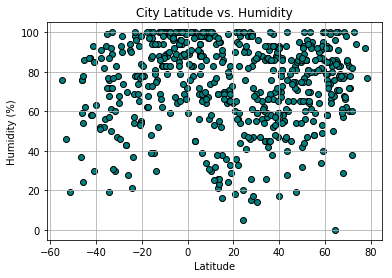

In [85]:
# Removed humidity outliers over 100 (given that the data is based on percentages) and reload the dataframe
api_city_df = pd.read_csv("../Output/OWMdataframe_OG.csv")
# Take the humidity column and convert it to a list to plot
humidity_list = api_city_df["Humidity (%)"].tolist()
# Take the lat (latitude) column and convert it to a list to plot
latitude_list = api_city_df["Lat"].tolist()
# Generate the plot for the values and apply the proper markers, title, and labels
plt.scatter(latitude_list, humidity_list, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Saves the figure
plt.savefig("../Output/latitude_vs_humidity.png")
# Shows the figure to check that the data distribution makes sense
plt.show()

#### Latitude vs. Humidity Plot

In [86]:
api_city_df.head()

,City,Country Code,Lat,Lng,Temperature (F),Humidity (%),Wind Speed (mph),Cloudiness (%)
0,Faanui,PF,-16.48,-151.75,82.66,100,6.96,68
1,Palora,EC,-1.70,-77.97,78.03,69,8.05,75
2,Bluff,AU,-23.58,149.07,70.51,69,12.21,0
3,Saskylakh,RU,71.97,114.09,-25.62,38,4.94,20
4,Cortez,US,37.35,-108.58,40.96,52,12.75,90


#### Latitude vs. Cloudiness Plot

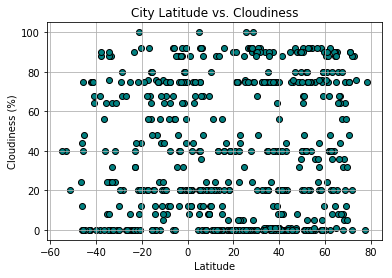

In [87]:
# Take the cloudiness column and convert it to a list to plot
cloudiness_list = api_city_df["Cloudiness (%)"].tolist()
# Generate the plot for the values and apply the proper markers, title, and labels
plt.scatter(latitude_list, cloudiness_list, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
# Saves the figure
plt.savefig("../Output/latitude_vs_cloudiness.png")
# Shows the figure to check that the data distribution makes sense
plt.show()

#### Latitude vs. Wind Speed Plot

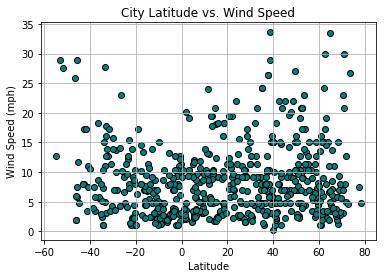

In [89]:
# Take the wind speed column and convert it to a list to plot
windspeed_list = api_city_df["Wind Speed (mph)"].tolist()
# Generate the plot for the values and apply the proper markers, title, and labels
plt.scatter(latitude_list, windspeed_list, marker="o", facecolors="teal", edgecolors="black")
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
# Saves the figure
plt.savefig("../Output/latitude_vs_windspeed.png")
# Shows the figure to check that the data distribution makes sense
plt.show()